# Real Estate Project

**The goal**:
- Determine the market value of real estate. 
- Set the right parameters for the automated system that tracks anomalies and fraudulent activity.

**Input data**: real estate data base of ads for the sale of apartments in St. Petersburg and the region for several years.  
Two types of data are available for each apartment for sale:
- The first ones are entered by the user.
- The second ones are obtained automatically on the basis of cartographic data (the distance to the center, airport, nearest park and pond).

**Analysis structure**:
* Data overview
* Data preparation
* Exploratory data analysis

## Data overview

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('real_estate_data.csv', sep='	')

In [80]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

There are 21 columns in the table:

`total_images` — number of images for each advertisement; data type `int`  
`last_price` — last price at the time of unpublishing; data type `float`  
`total_area` — area of the apartment in square meters (m²); data type `float`  
`first_day_exposition` - publication date; data type `object`  
`rooms` - number of rooms; data type `int`  
`ceiling_height` - ceiling height (m); data type `float`  
`floors_total` - total floors in the house; data type `float`  
`living_area` - living area in square meters (m²); data type `float`  
`floor` - floor of the apartment in sale; data type `int`   
`is_apartment` - whether an apartment; data type `object`  
`studio` - whether a studio; data type `boolean`  
`open_plan` - whether has an open plan; data type `boolean`  
`kitchen_area` - kitchen area in square meters (m²); data type `float`  
`balcony` — number of balconies; data type `float`  
`locality_name` — name of the locality; data type `object`  
`airports_nearest`- distance to the nearest airport in meters (m); data type `float`  
`cityCenters_nearest` - distance to the city center (m); data type `float`   
`parks_around3000` - number of parks within a 3 km radius; data type `float`    
`parks_nearest` - distance to the nearest park (m); data type `float`            
`ponds_around3000`- the number of ponds within a radius of 3 km; data type `float`         
`ponds_nearest`— distance to the nearest body of water (m); data type `float`            
`days_exposition`- how many days the ad was placed (from publication to withdrawal); data type `float`          


- Non-null count for columns is different, so there are missing values in `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, and `days_exposition`.

In [82]:
# set floats formats (in order not to see scientific notation)
pd.options.display.float_format = '{:.2f}'.format

<AxesSubplot:title={'center':'Proportion of missing values'}>

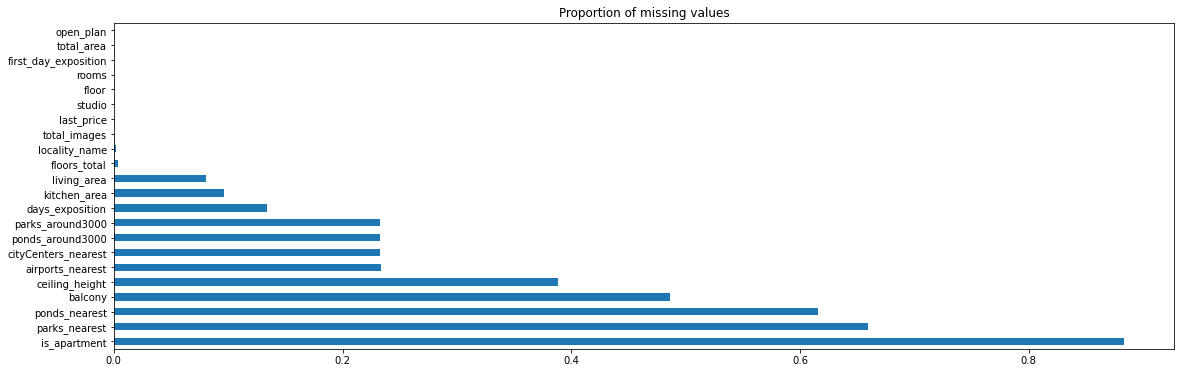

In [83]:
(
    df
     .isna()
     .mean()
     .sort_values(ascending=False)
     .plot(kind='barh', figsize=(19,6), legend=False, title='Proportion of missing values')
)

In [84]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Quickly looking through the main statistics, it's clear that there are quite significant outliers in `last_price`, `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area` that need to be analyzed in detail further.

## Data preparation

### Changing formats

We change format for dates and time from `object` to `datetime` so it is easier to work with further on.

In [85]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [86]:
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

We change formats for `last_price` to `int` type as it makes more sence.

In [87]:
df['last_price'] = df['last_price'].astype('int')

In [88]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Adding new columns

We add new columns with the price per square meter, additional data about the dates, floors, and the ratios of total area to living and kitchen ones. 

In [89]:
df['price_per_m'] = df['last_price'] / df['total_area']

In [90]:
df['day_week'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

For the floor identification we need to create a function which states whether the floor is `first`, `last`, or `other` one.  

In [91]:
def floor(row):
    floor = row['floor']
    floors_total = row['floors_total'] 
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    else: 
        return 'other'

In [92]:
df['floor_group'] = df.apply(floor, axis=1)

In [93]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

### Missing values in data

For many columns it is impossible to fill the missing data so we just leave it empty.  
However, we can still fill for some.  
We start with the `balcony` as most probably here missing data means that there are `0` balconies.  
And then we also convert it to `int` type.

In [94]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

We fill the missing data in `living_area` and `kitchen_area` with median ratios to `total_area` according to the number of rooms.

In [95]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_to_total'].transform('median'))

In [96]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_to_total'].transform('median'))

In [97]:
# check for anomalies after adj

(df['total_area'] * 0.9 <= (df['living_area'] + df['kitchen_area'])).sum()

485

We drop the rows where the `locality_name` is missing as there are only 49 values, so they do not bring great difference but make the analysis harder.

In [98]:
df = df[df['locality_name'].notna()]

In [99]:
df.shape

(23650, 29)

We fill the missing data for `floor` and `floors_total` with `0` and turn the type into `int` as we would need it for the further analysis.

In [100]:
df['floor'] = df['floor'].fillna(0).astype('int')
df['floors_total'] = df['floors_total'].fillna(0).astype('int')

### Duplicates in data

We check for general duplicates first.

In [101]:
df.duplicated().sum()

0

In [102]:
df['locality_name'].nunique()

364

In [103]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [104]:
# change some equal letters in names

df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [105]:
# check

df['locality_name'].nunique()

330

### Anomalies in data

In [106]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_week,month,year,floor_group,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.00,755.00,NaN,120370.37,3,3,2019,other,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,0.00,NaN,81.00,82920.79,1,12,2018,first,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,2.00,574.00,558.00,92785.71,3,8,2015,other,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,NaN,14,0.63,9,True,...,3.00,234.00,424.00,408176.10,4,7,2015,other,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.00,48.00,121.00,100000.00,1,6,2018,other,0.32,0.41


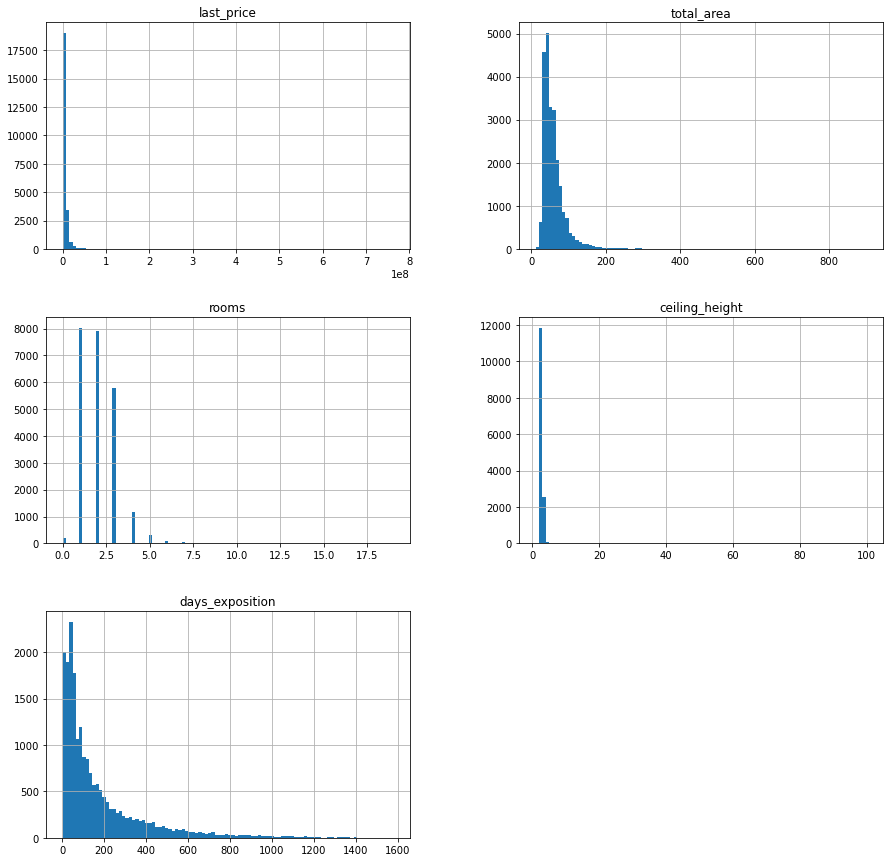

In [107]:
columns_in_research = [['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']]

for c in columns_in_research:
    df[c].hist(bins=100, figsize=(15,15))

We clearly see that there are significant outliers in all the charts, so we dive deeper to analyze in more detail.

#### Prices

Text(0.5, 1.0, 'Price distribution up to 10 mln')

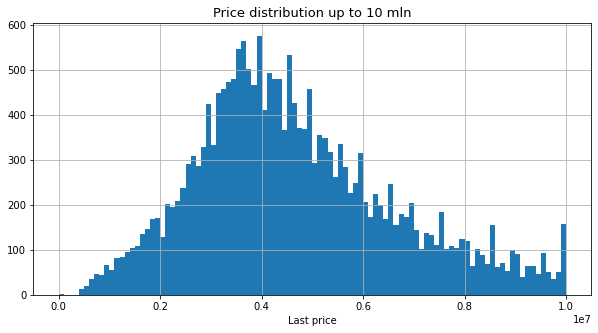

In [108]:
ax = df['last_price'].hist(bins=100, figsize=(10,5), range=(0, 10000000))
ax.set_xlabel('Last price')
ax.set_title('Price distribution up to 10 mln', fontsize = 13)

In this part the distribution looks pretty ok: the peak is a bit less than 4 mln which seems to be in the market.  
There are some postings that are almost value 0.

We believe the price in absolute values doesn't show us much even when there are def big outliers. So we think it is more appropriate to check relative price per square meter which can give us more details.

In [109]:
df['price_per_m'].describe()

count     23650.00
mean      99432.25
std       50337.94
min         111.83
25%       76614.97
50%       95000.00
75%      114274.16
max     1907500.00
Name: price_per_m, dtype: float64

**Good**: mean and median are pretty close to each other and make sense according to market understanding.  
**Bad**: there are def outliers looking at min and max values.

Text(0.5, 1.0, 'Price/m2 distribution')

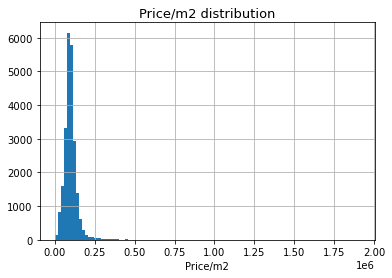

In [110]:
ax = df['price_per_m'].hist(bins=100)
ax.set_xlabel('Price/m2')
ax.set_title('Price/m2 distribution', fontsize = 13)

The distribution is the Poisson one as expected.  
However, we need to have a look into both tails deeper.

Text(0.5, 1.0, 'Price/m2 distribution up to 100k')

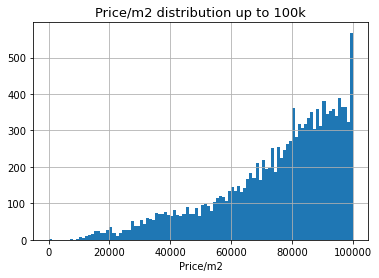

In [111]:
ax = df['price_per_m'].hist(bins=100, range=(0, 100000))
ax.set_xlabel('Price/m2')
ax.set_title('Price/m2 distribution up to 100k', fontsize = 13)

In [112]:
df.query('price_per_m < 25000')['last_price'].count()

282

The left tail seems to be ok; small numbers are few and distributed also in an ok way.
Anyway, we decide to cut all the postings with the price/m2 less than 25k to be more in line with our market understanding.  
It's only around 1% of our data so we don't cut significant portion.

In [113]:
# np stands for `neutral prices`

df_np = df.query('price_per_m > 25000')

Text(0.5, 1.0, 'Price/m2 distribution from 100k')

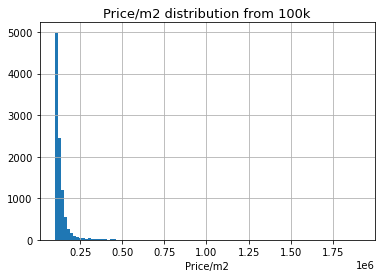

In [114]:
ax = df_np['price_per_m'].hist(bins=100, range=(100000, df_np['price_per_m'].max()))
ax.set_xlabel('Price/m2')
ax.set_title('Price/m2 distribution from 100k', fontsize = 13)

In [115]:
df_np.query('price_per_m > 250000')['price_per_m'].count()

275

The right tail is def biased more to the left; as we can see there are only 234 postings (again around 1% of all the data) with price/m2 higher than 250000, which can be a case as there are some super luxurious flats in every city.  
We do cut these postings in order to get more neutral picture of the market.

In [116]:
df_np = df_np.query('price_per_m < 250000')

Text(0.5, 1.0, 'Price/m2 distribution')

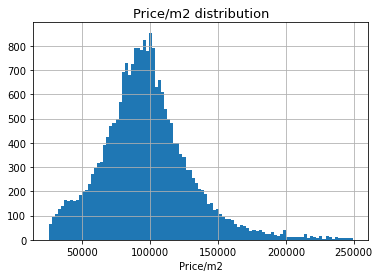

In [117]:
ax = df_np['price_per_m'].hist(bins=100)
ax.set_xlabel('Price/m2')
ax.set_title('Price/m2 distribution', fontsize = 13)

In [118]:
df_np['price_per_m'].describe()

count    23081.00
mean     96997.78
std      32766.09
min      25031.29
25%      77173.91
50%      95000.00
75%     113636.36
max     249375.00
Name: price_per_m, dtype: float64

Now both the distribution and general statistics look ok for us.  
The nice thing is that after manipulations the mean and median haven't shifted much compared to a raw data.

#### Area

In [119]:
df_np['total_area'].describe()

count   23081.00
mean       59.39
std        33.07
min        12.00
25%        40.00
50%        51.80
75%        69.00
max       631.20
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Total area distribution')

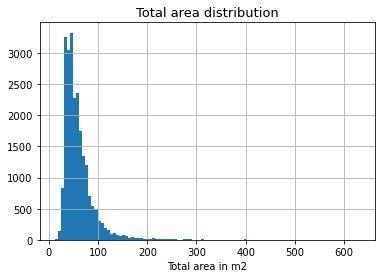

In [120]:
ax = df_np['total_area'].hist(bins=100)
ax.set_xlabel('Total area in m2')
ax.set_title('Total area distribution', fontsize = 13)

The distribution is the Poisson one as expected.
However, we need to have a look into both tails deeper.

Text(0.5, 1.0, 'Total area distribution up to 100 sqm')

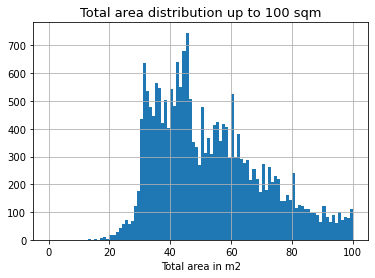

In [121]:
ax = df_np['total_area'].hist(bins=100, range=(0,100))
ax.set_xlabel('Total area in m2')
ax.set_title('Total area distribution up to 100 sqm', fontsize = 13)

Text(0.5, 1.0, 'Total area distribution from 100 to 400 sqm')

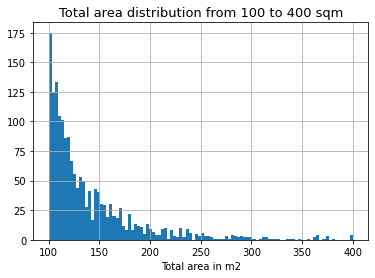

In [122]:
ax = df_np['total_area'].hist(bins=100, range=(100, 400))
ax.set_xlabel('Total area in m2')
ax.set_title('Total area distribution from 100 to 400 sqm', fontsize = 13)

In [123]:
df_np.query('total_area < 25 or total_area > 200 ')['total_area'].count()

363

We decide to cut the data with total area less than 25 sqm and more than 200 sqm (which in total are around 1,5% of all data) to get rid of the biggest outliers. 

In [124]:
# since now we will just update in one df called `clean`

df_clean = df_np.query('total_area > 25').query('total_area < 200')

#### Rooms

In [125]:
df_clean['rooms'].describe()

count   22673.00
mean        2.04
std         0.99
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        11.00
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Rooms distribution')

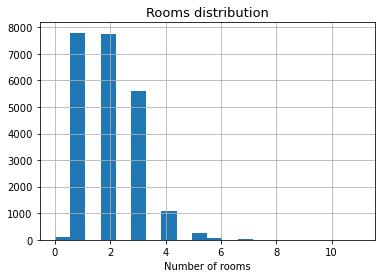

In [126]:
ax = df_clean['rooms'].hist(bins=20)
ax.set_xlabel('Number of rooms')
ax.set_title('Rooms distribution', fontsize = 13)

In [127]:
df_clean.groupby('rooms')['studio'].sum()

rooms
0     81
1      8
2      0
3      0
4      0
5      0
6      0
7      0
8      0
11     0
Name: studio, dtype: int64

Almost all studios are with `0` or `1` rooms, so `0` rooms in the histogram above is not a surprise. We leave it as it is.

In [128]:
df_clean.query('rooms > 6')['rooms'].count()

24

We cut all the postings with more than 6 rooms: there are only 24 of them.

In [129]:
df_clean = df_clean.query('rooms < 6')

In [130]:
# check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22588 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22588 non-null  int64         
 1   last_price            22588 non-null  int32         
 2   total_area            22588 non-null  float64       
 3   first_day_exposition  22588 non-null  datetime64[ns]
 4   rooms                 22588 non-null  int64         
 5   ceiling_height        13923 non-null  float64       
 6   floors_total          22588 non-null  int32         
 7   living_area           22588 non-null  float64       
 8   floor                 22588 non-null  int32         
 9   is_apartment          22588 non-null  bool          
 10  studio                22588 non-null  bool          
 11  open_plan             22588 non-null  bool          
 12  kitchen_area          22470 non-null  float64       
 13  balcony         

#### Ceiling height

In [131]:
df_clean['city_center_km'] = round(df_clean['cityCenters_nearest'] / 1000)

In [132]:
df_clean['ceiling_height'].describe()

count   13923.00
mean        2.75
std         0.96
min         1.00
25%         2.50
50%         2.65
75%         2.80
max        32.00
Name: ceiling_height, dtype: float64

There are many missing data in ceiling height.   
So we first fill for St.Petersburg as there are very different types of buildings (i.e. in the city center with higher ceilings and outside the center in the sleeping zones with lower ceiling height) and then all others with the median value for each locality.

In [133]:
df_clean['ceiling_height'] = (
                            df_clean
                              .query('locality_name == "Санкт-Петербург"')['ceiling_height']
                              .fillna(df_clean.groupby('city_center_km')['ceiling_height'].transform('median'))
                             )

In [134]:
df_clean['ceiling_height'] = df_clean['ceiling_height'].fillna(df_clean['ceiling_height'].median())

Text(0.5, 1.0, 'Ceiling height distribution')

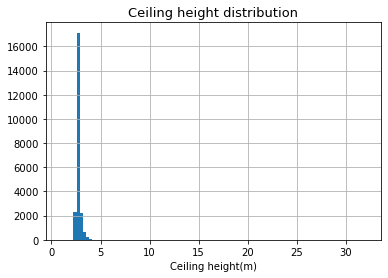

In [135]:
ax = df_clean['ceiling_height'].hist(bins=100)
ax.set_xlabel('Ceiling height(m)')
ax.set_title('Ceiling height distribution', fontsize = 13)

In [136]:
df_clean.query('ceiling_height > 5')['ceiling_height'].count()

18

We cut all the postings with ceiling height more than 5m: there are only 18 of them.

In [137]:
df_clean = df_clean.query('ceiling_height < 5')

We check the basic statistics for the price/m2 ratio after all the cuts.

In [138]:
df_clean['price_per_m'].describe()

count    22570.00
mean     96643.31
std      32510.34
min      25031.29
25%      77000.00
50%      94809.60
75%     113333.33
max     249375.00
Name: price_per_m, dtype: float64

Everything looks more than ok!  
We have cut less than 5% of raw data without shifting much the mean and median of price/m2 which is great.  
Moreover, they even became closer to each other which shows the robustness of the clean data.

<AxesSubplot:>

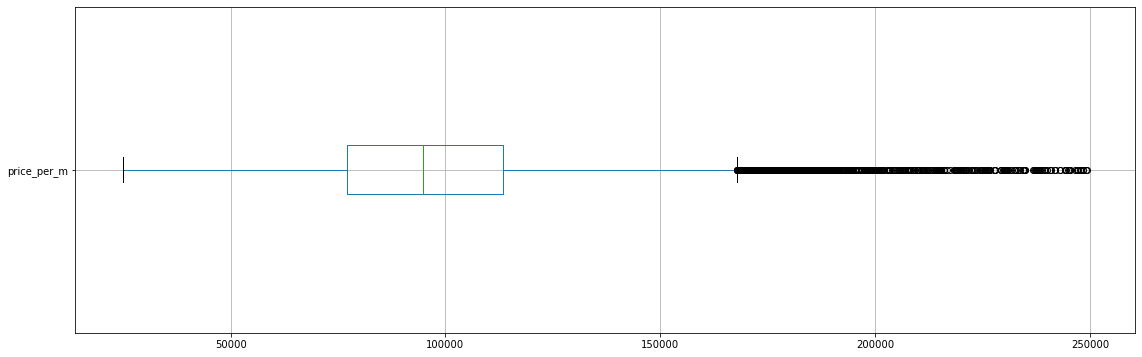

In [139]:
(df_clean.boxplot('price_per_m', vert=False, figsize=(19,6)))

In [140]:
# check

(
    df_clean[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'price_per_m']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
)

,rooms,total_area,ceiling_height,days_exposition,last_price,price_per_m
count,22570.00,22570.00,22570.00,19607.00,22570.00,22570.00
min,0.00,25.07,1.00,1.00,750000.00,25031.29
mean,2.02,57.68,2.68,179.46,5724027.18,96643.31
median,2.00,51.70,2.60,95.00,4630000.00,94809.60
max,5.00,199.20,4.70,1580.00,46000000.00,249375.00


## Exploratory data analysis

#### Days at sale

In [141]:
df_clean['days_exposition'].describe()

count   19607.00
mean      179.46
std       218.06
min         1.00
25%        45.00
50%        95.00
75%       229.00
max      1580.00
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Duration of postings distribution')

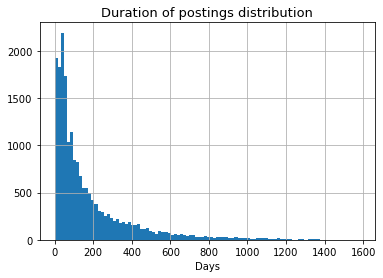

In [142]:
ax = df_clean['days_exposition'].hist(bins=100)
ax.set_xlabel('Days')
ax.set_title('Duration of postings distribution', fontsize = 13)

In [143]:
df_clean.query('days_exposition > 365')['days_exposition'].count()

2887

Text(0.5, 1.0, 'Duration of postings distribution up to 1 year')

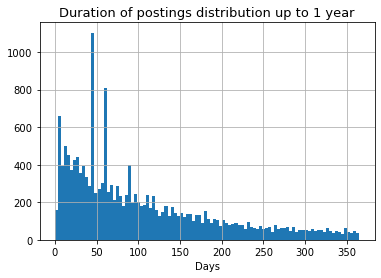

In [144]:
ax = df_clean['days_exposition'].hist(bins=100, range=(0,365))
ax.set_xlabel('Days')
ax.set_title('Duration of postings distribution up to 1 year', fontsize = 13)

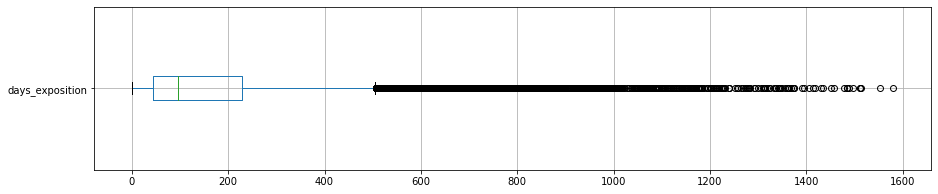

In [145]:
ax = df_clean.boxplot('days_exposition', vert = False, figsize=(15,3))

1) There are some missing data for around 3k postings which we decide not to fill with anything.  
2) On average, the sale takes place around half a year.  
3) Half of all the postings with data on sale duration, however, was sold within 3 months only.  
4) There are 2885 postings which took more than year to sell (and up to 5 years!).  
5) Such high numbers can also be a case that after sale people forgot to delete a posting from the platform (on the other hand, they would be receiving calls for such a long time... so it is a big question mark).  
6) We can say that fast sale is around 1,5 months, and super long sale is more than 1,5 years.

#### Factors influincing the price

We create new df for the charts only with columns in research.

In [146]:
df_graph = df_clean.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'floor_group', 'day_week', 'month',
       'year', 'price_per_m']]

In [147]:
df_graph.corr()

,last_price,total_area,rooms,cityCenters_nearest,day_week,month,year,price_per_m
last_price,1.00,0.81,0.50,-0.34,-0.01,0.00,-0.03,0.67
total_area,0.81,1.00,0.78,-0.22,-0.02,0.01,-0.08,0.18
rooms,0.50,0.78,1.00,-0.15,-0.01,-0.00,-0.05,-0.06
cityCenters_nearest,-0.34,-0.22,-0.15,1.00,0.01,-0.01,0.03,-0.41
day_week,-0.01,-0.02,-0.01,0.01,1.00,0.01,-0.00,-0.01
month,0.00,0.01,-0.00,-0.01,0.01,1.00,-0.27,-0.01
year,-0.03,-0.08,-0.05,0.03,-0.00,-0.27,1.00,0.05
price_per_m,0.67,0.18,-0.06,-0.41,-0.01,-0.01,0.05,1.00


We can clearly see that `total_area` and `rooms` has a significant influence on price, while day of the week, month, and year do not have any linear dependence.  
What is very surprising is that there is small and negative correlation with the distance to city center. This data point is counterintuitive.

Text(0.5, 1.0, 'Dependence of total area to the price')

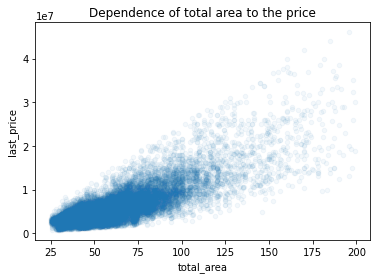

In [148]:
ax = df_graph.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05)
ax.set_title('Dependence of total area to the price')

The graph proves the linear positive correlation: the bigger the total area, the higher is the price.

Text(0.5, 1.0, 'Dependence of number of rooms to the price')

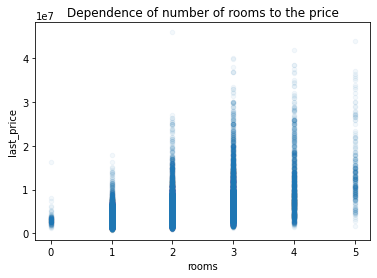

In [149]:
ax = df_graph.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05)
ax.set_title('Dependence of number of rooms to the price')

The graph shows not strong relationship, although the trend is upwards.

Text(0.5, 1.0, 'Dependence of distance to city center on the price')

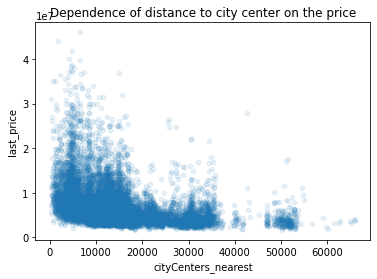

In [150]:
ax = df_graph.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1)
ax.set_title('Dependence of distance to city center on the price')

We believe there is no clear correlation in the data above due to the fact that we are looking at whole data base mixing different cities, so in further analysis specifically for St.Petersburg it should be way more linearly dependent.

Text(0.5, 1.0, 'Dependence of the day of the week on price/m2')

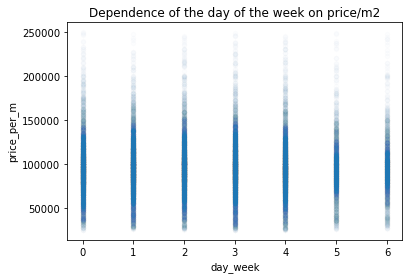

In [151]:
ax = df_graph.plot(x='day_week', y='price_per_m', kind='scatter', alpha=0.01)
ax.set_title('Dependence of the day of the week on price/m2')

No great dependence between price/m2 and day of the week spotted.  
The small difference is between weekdays and weekends: the latter have higher prices per sqm.

<AxesSubplot:title={'center':'Median price of the posting on day of the week'}, xlabel='day_week', ylabel='Median price'>

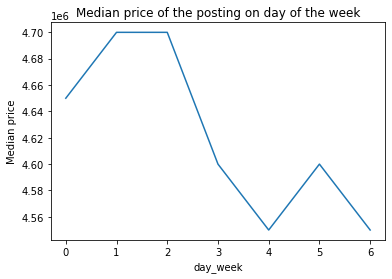

In [152]:
(df_graph.groupby('day_week')['last_price']
 .median()
 .plot(ylabel='Median price', title='Median price of the posting on day of the week')
)

It is interesting that the median price of the posting is highest on Tuesdays and Wednesdays and the lowest on Sundays.

Text(0.5, 1.0, 'Dependence of month of posting to price/m2')

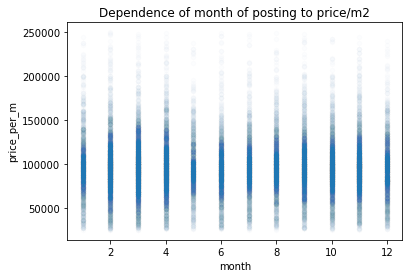

In [153]:
ax = df_graph.plot(x='month', y='price_per_m', kind='scatter', alpha=0.01)
ax.set_title('Dependence of month of posting to price/m2')

No great dependence between price/m2 and month spotted.

<AxesSubplot:title={'center':'Median price of the posting on month'}, xlabel='month', ylabel='Median price'>

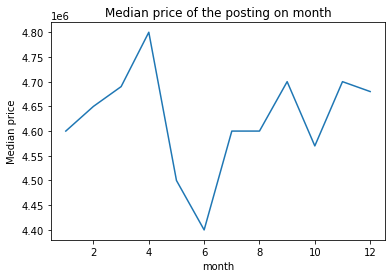

In [154]:
(df_graph.groupby('month')['last_price']
 .median()
 .plot(ylabel='Median price', title='Median price of the posting on month')
)

The highest median prices of the postings are in April and lowest ones are in June. Through other months the median price is pretty stable.

Text(0.5, 1.0, 'Dependence of year of posting to price/m2')

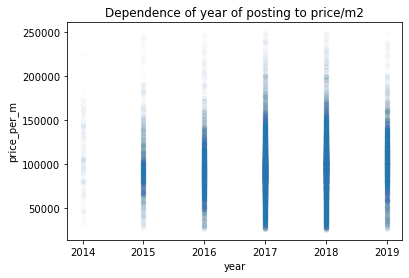

In [155]:
ax = df_graph.plot(x='year', y='price_per_m', kind='scatter', alpha=0.01)
ax.set_title('Dependence of year of posting to price/m2')

The graph shows that in 2017-2018 there was a greater width of price/m2 which can be explained by the growth of the use platform (which is proved in the graph below).

<AxesSubplot:title={'center':'Number of postings per year'}, xlabel='year', ylabel='Number of postings'>

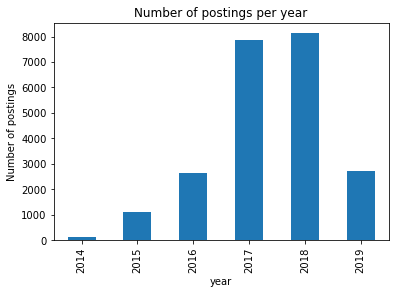

In [156]:
df_graph.groupby('year')['year'].count().plot(kind='bar', ylabel='Number of postings', title='Number of postings per year')

<AxesSubplot:title={'center':'Median price of the posting on year'}, xlabel='year', ylabel='Median price'>

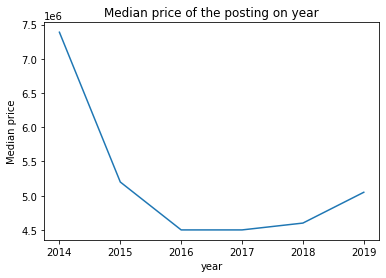

In [157]:
(df_graph.groupby('year')['last_price']
 .median()
 .plot(ylabel='Median price', title='Median price of the posting on year')
)

It seems at the beginning the platform was mostly used to sell more luxiourios spaces (however, the number of posting was very small).  
Since 2016 there is an upwarding trend in the median price of the posting.

<AxesSubplot:title={'center':'Median price/m2 depending on the floor'}, xlabel='floor_group', ylabel='Median price/m2'>

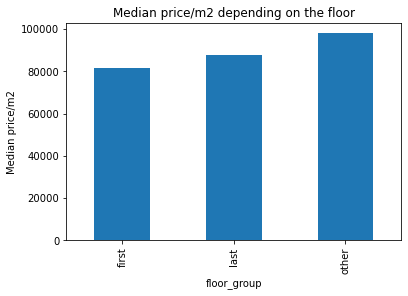

In [158]:
(df_graph.groupby('floor_group')['price_per_m']
 .median()
 .plot(kind='bar', ylabel='Median price/m2', title='Median price/m2 depending on the floor')
)

The data shows quite intuitive results regarding the dependence b/w price and floor group. Being in the middle (i.e. not first or last) costs more.

#### Localities analysis

We find top 10 localities by the amount of postings in each and show mean price per square m there.

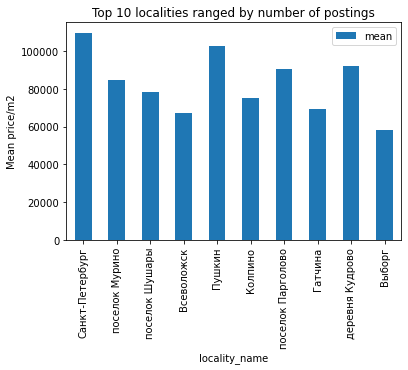

In [159]:
ax = (df_clean.groupby('locality_name')['price_per_m']
             .agg(['count', 'mean'])
             .sort_values(by='count', ascending=False)
             .head(10)
             .plot(kind='bar', y='mean', title='Top 10 localities ranged by number of postings', ylabel='Mean price/m2')
     )

Everything as expected: St.Petersburg has the highest number of postings and highest mean price/m2 among those ones.

Now we check for top and bottom 3 localities by price/m2.

In [160]:
g1 = df_clean.groupby('locality_name')['price_per_m'].mean().sort_values(ascending=False).head(3)

In [161]:
g2 = df_clean.groupby('locality_name')['price_per_m'].mean().sort_values(ascending=False).tail(3)

<AxesSubplot:title={'center':'Top and bottom 3 localities by mean price/m2'}, xlabel='locality_name', ylabel='Mean price/m2'>

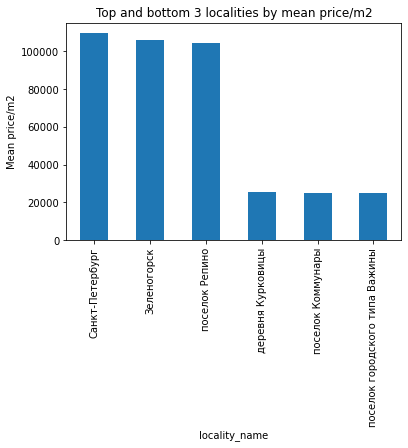

In [162]:
g = pd.concat((g1, g2), axis=0)
g.plot(kind='bar', title='Top and bottom 3 localities by mean price/m2', ylabel='Mean price/m2')

#### Saint Petersburg analysis

In [163]:
df_sp = df_clean.query('locality_name == "Санкт-Петербург"').copy()
df_sp.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m,day_week,month,year,floor_group,living_to_total,kitchen_to_total,city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,755.00,NaN,120370.37,3,3,2019,other,0.47,0.23,16.00
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,True,...,574.00,558.00,92785.71,3,8,2015,other,0.61,0.15,14.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48.00,121.00,100000.00,1,6,2018,other,0.32,0.41,8.00
7,5,7915000,71.60,2019-04-18,2,2.60,24,0.59,22,True,...,NaN,NaN,110544.69,3,4,2019,other,NaN,0.26,12.00
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,NaN,289.00,88524.59,6,2,2017,other,0.71,0.11,15.00


<AxesSubplot:title={'center':'Median price/m2 in St.P. by distance from city center'}, xlabel='city_center_km', ylabel='Median price/m2'>

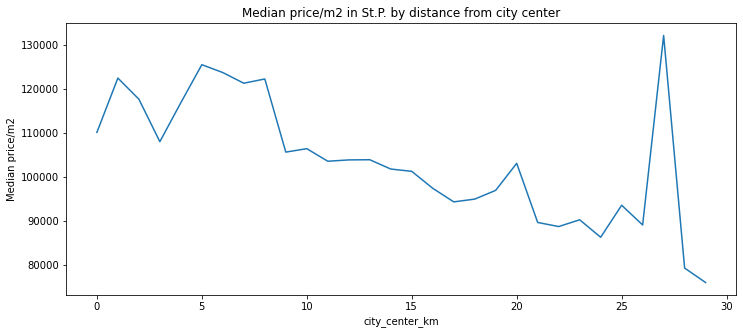

In [164]:
(df_sp.groupby('city_center_km')['price_per_m']
     .median()
     .plot(figsize=(12,5), title='Median price/m2 in St.P. by distance from city center', ylabel='Median price/m2')
)

Some findings:
* There is no clear linear downtrend in left part (the most central postings) which is strange.
* There is big jump around 27th km from the center which could potentially be explained by the luxiourous houses already outside the city but still being registered under this locality.
* Median price/m2 for postings with unknown distance to center is pretty high which could lead to the idea that those one are either from the city center or closer to 27th km. We need to discuss to developers to understand why there are missing data for the distance as this data is filled by our systems.  
  
It is hard to clearly state the central zone from this graph (although it feels somewhere between 10 and 15km from center), so we check more graphs.

<AxesSubplot:title={'center':'Median total area in St.P. by distance from city center'}, xlabel='city_center_km', ylabel='Median total area'>

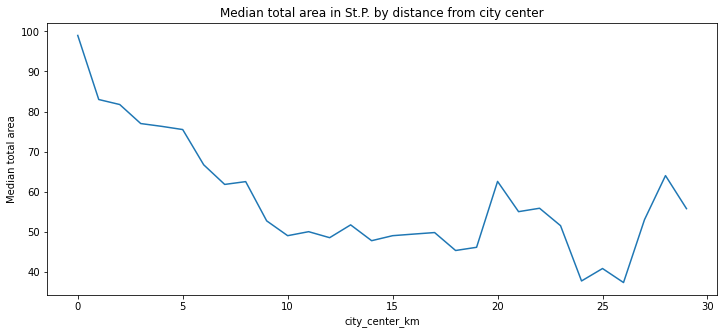

In [165]:
(df_sp.groupby('city_center_km')['total_area']
     .median()
     .plot(figsize=(12,5), title='Median total area in St.P. by distance from city center', ylabel='Median total area')
)

Here we clearly see that the plateau in median `total_area` is again between 10 and 15 km.  
This plateau could mean the typical huge apartment block in the so called "sleeping" areas.

<AxesSubplot:title={'center':'Median price in St.P. by distance from city center'}, xlabel='city_center_km', ylabel='Median price'>

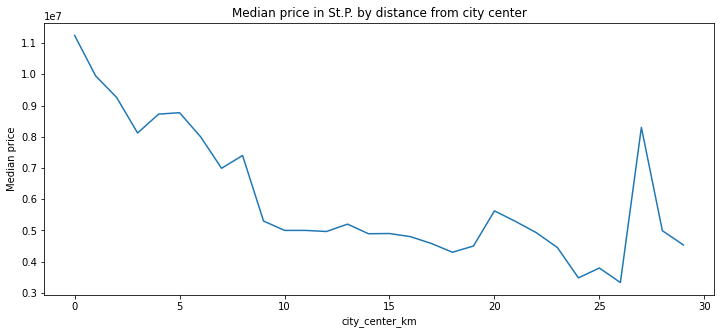

In [166]:
(df_sp.groupby('city_center_km')['last_price']
     .median()
     .plot(figsize=(12,5), title='Median price in St.P. by distance from city center', ylabel='Median price')
)

The graph with median `last_price` helps to prove the findings in two previous ones.  
So we decide to state that the central zone is within **10 km**. 

#### Saint Petersburg center analysis

In [167]:
# we slice new dataframe for St.P. city center 

df_sp_c = df_sp.query('city_center_km != "unknown"').query('city_center_km <= 10')
df_sp_c.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m,day_week,month,year,floor_group,living_to_total,kitchen_to_total,city_center_km
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48.00,121.00,100000.00,1,6,2018,other,0.32,0.41,8.00
21,13,3200000,31.60,2018-03-14,1,2.60,5,16.90,2,True,...,NaN,310.00,101265.82,2,3,2018,other,0.53,0.18,10.00
24,8,6500000,97.20,2015-10-31,2,3.20,3,46.50,1,True,...,124.00,265.00,66872.43,5,10,2015,first,0.48,0.20,2.00
35,6,15500000,149.00,2017-06-26,5,3.00,5,104.00,4,True,...,779.00,644.00,104026.85,0,6,2017,other,0.70,0.11,4.00
56,14,4350000,41.00,2016-03-28,1,2.80,7,18.10,4,False,...,439.00,152.00,106097.56,0,3,2016,other,0.44,0.27,10.00


In [168]:
# we select the only columns in research

center = df_sp_c.loc[:, ['last_price', 'price_per_m', 'total_area', 'rooms', 'ceiling_height', 'city_center_km', 'floor_group', 'day_week', 'month',
       'year', 'days_exposition']]

In [169]:
center.describe()

,last_price,price_per_m,total_area,rooms,ceiling_height,city_center_km,day_week,month,year,days_exposition
count,4909.00,4909.00,4909.00,4909.00,4909.00,4909.00,4909.00,4909.00,4909.00,4211.00
mean,9036166.07,122390.78,72.96,2.41,2.92,6.25,2.52,6.36,2017.25,219.64
std,5450345.04,34416.98,32.93,1.06,0.29,2.61,1.75,3.43,1.10,255.97
min,2100000.00,26250.00,25.20,0.00,2.00,0.00,0.00,1.00,2014.00,2.00
25%,5350000.00,97290.64,46.90,2.00,2.74,4.00,1.00,3.00,2017.00,54.00
50%,7500000.00,115384.62,66.40,2.00,2.90,6.00,3.00,6.00,2017.00,118.00
75%,10900000.00,140394.09,90.30,3.00,3.05,9.00,4.00,9.00,2018.00,296.00
max,46000000.00,249375.00,198.90,5.00,4.70,10.00,6.00,12.00,2019.00,1512.00


In [170]:
center.corr()

,last_price,price_per_m,total_area,rooms,ceiling_height,city_center_km,day_week,month,year,days_exposition
last_price,1.00,0.60,0.82,0.52,0.32,-0.27,-0.02,0.00,-0.04,0.15
price_per_m,0.60,1.00,0.09,-0.16,0.12,-0.13,0.00,-0.03,0.08,0.04
total_area,0.82,0.09,1.00,0.79,0.39,-0.32,-0.02,0.02,-0.10,0.18
rooms,0.52,-0.16,0.79,1.00,0.32,-0.29,-0.02,0.01,-0.08,0.14
ceiling_height,0.32,0.12,0.39,0.32,1.00,-0.58,-0.02,0.02,-0.08,0.13
city_center_km,-0.27,-0.13,-0.32,-0.29,-0.58,1.00,0.01,-0.03,0.10,-0.13
day_week,-0.02,0.00,-0.02,-0.02,-0.02,0.01,1.00,0.02,0.01,-0.04
month,0.00,-0.03,0.02,0.01,0.02,-0.03,0.02,1.00,-0.26,-0.02
year,-0.04,0.08,-0.10,-0.08,-0.08,0.10,0.01,-0.26,1.00,-0.64
days_exposition,0.15,0.04,0.18,0.14,0.13,-0.13,-0.04,-0.02,-0.64,1.00


<AxesSubplot:title={'center':'Dependence of total area to the price'}, xlabel='total_area', ylabel='last_price'>

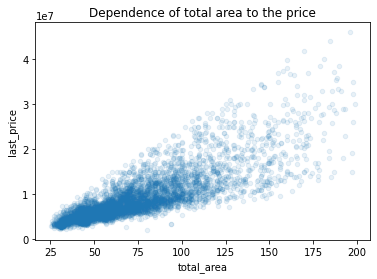

In [171]:
center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, title='Dependence of total area to the price')

The graph proves the linear positive correlation: the bigger the total area, the higher is the price.

<AxesSubplot:title={'center':'Dependence of number of rooms to the price'}, xlabel='rooms', ylabel='last_price'>

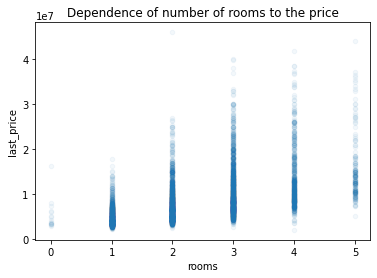

In [172]:
center.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05, title='Dependence of number of rooms to the price')

The graph shows not strong relationship, although the trend is upwards.

<AxesSubplot:title={'center':'Median price depending on number of rooms'}, xlabel='rooms', ylabel='Median price'>

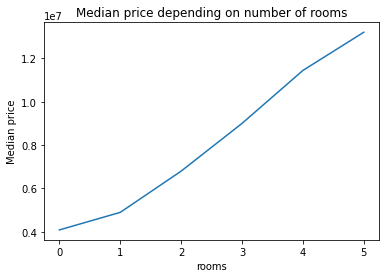

In [173]:
(center
 .groupby('rooms')['last_price']
 .median()
 .plot(title='Median price depending on number of rooms', ylabel='Median price')
)

The graph shows strong upward trend: the more rooms, the higher median price of the posting.

<AxesSubplot:title={'center':'Median price depending on the distance to the center'}, xlabel='city_center_km', ylabel='Median price'>

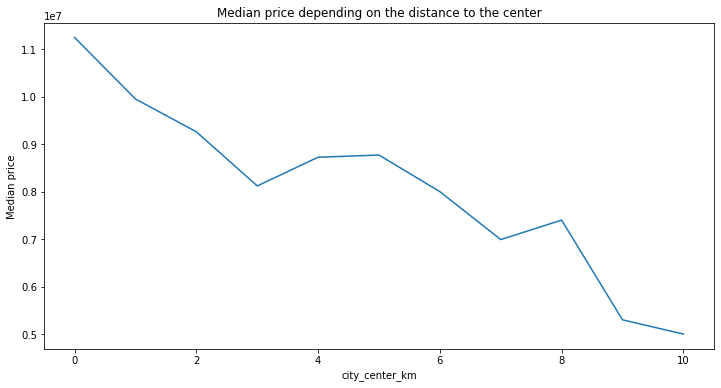

In [174]:
(center
 .groupby('city_center_km')['last_price']
 .median()
 .plot(title='Median price depending on the distance to the center', ylabel='Median price', figsize=(12,6))
)

The farer away from the city center, the lower the median price of the posting.

<AxesSubplot:title={'center':'Median price of the posting on day of the week'}, xlabel='day_week', ylabel='Median price'>

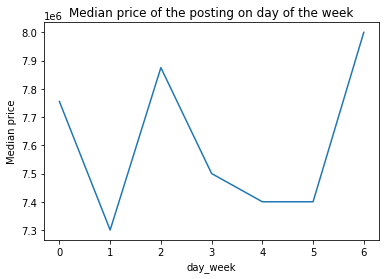

In [175]:
(center.groupby('day_week')['last_price']
 .median()
 .plot(ylabel='Median price', title='Median price of the posting on day of the week')
)

Here, opposite to the whole data base, the highest median posting price is on Sunday, while the lowest one on Monday.

<AxesSubplot:title={'center':'Median price of the posting on month'}, xlabel='month', ylabel='Median price'>

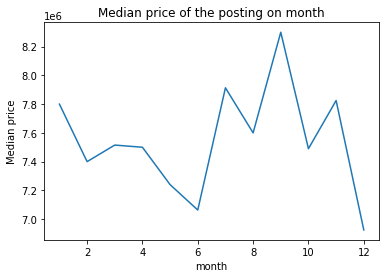

In [176]:
(center.groupby('month')['last_price']
 .median()
 .plot(ylabel='Median price', title='Median price of the posting on month')
)

Here, opposite to the whole data base, the highest median prices of the postings are in September and lowest ones are in December.

<AxesSubplot:title={'center':'Median price of the posting on year'}, xlabel='year', ylabel='Median price'>

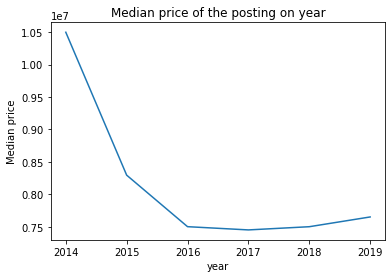

In [177]:
(center.groupby('year')['last_price']
 .median()
 .plot(ylabel='Median price', title='Median price of the posting on year')
)

Here is the same as for the whole data base:  
* It seems at the beginning the platform was mostly used to sell more luxiourios spaces (however, the number of posting was very small).  
* Since 2016 there is an upwarding trend in the median price of the posting.

<AxesSubplot:title={'center':'Median price/m2 depending on the floor'}, xlabel='floor_group', ylabel='Median price/m2'>

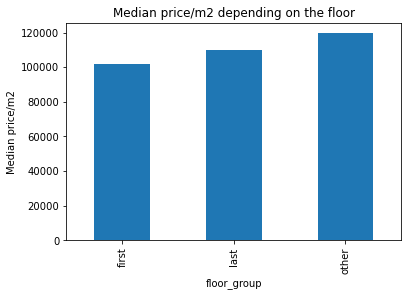

In [178]:
(center.groupby('floor_group')['price_per_m']
 .median()
 .plot(kind='bar', ylabel='Median price/m2', title='Median price/m2 depending on the floor')
)

The data shows quite intuitive results regarding the dependence b/w price and floor group. Being in the middle (i.e. not first or last) costs more.

## Results

In [179]:
# create comparison b/w whole data base and St.P. center one

d = (df_clean[['last_price', 'price_per_m', 'days_exposition', 'rooms', 'ceiling_height']]
    .apply (['mean', 'median'])   
    )

c = (center[['last_price', 'price_per_m', 'days_exposition', 'rooms', 'ceiling_height']]
    .apply (['mean', 'median'])   
    )

results = d.join(c, lsuffix='_df_clean', rsuffix='_center')
results['psqm_diff'] = results['price_per_m_center'] / results['price_per_m_df_clean']
results['price_diff'] = results['last_price_center'] / results['last_price_df_clean']
results['days_diff'] = results['days_exposition_center'] / results['days_exposition_df_clean']
results[['psqm_diff', 'price_diff', 'days_diff']]

,psqm_diff,price_diff,days_diff
mean,1.27,1.58,1.22
median,1.22,1.62,1.24


* We analysed the real estate data base of ads for the sale of apartments in St. Petersburg and the region for several years.
* We prepared the data cutting around 5% of raw data due to anomalies in prices, area, number of rooms, and ceiling height.
* We managed not to shift significantly the mean and median of price/m2 compared to an original data which is great. Moreover, those measures even became closer to each other which shows the robustness of the clean data.
* Analysing the duration of the postings we came to a conclusion that the fast sale takes around 1,5 months, and super long sale is more than 1,5 years.
* Comparing St.Petersburg center to the whole data base, we got to the point that an average price for a posting is 33% higher for the central flats, the price/m2 is 11% higher, and the duration of the posting is 22% longer on average.
* Both datasets have clear positive linear dependencies on total area and number of rooms.
* As expected, the median price of the posting depending on the distance to city center is going down the farer it is.
* Everywhere the highest median prices/m2 are not for the first or last floors.